# SafeNet Crime Data Analysis (San Francisco)

Based on the article, "The 15 Safest Neighborhoods In San Francisco", by Jessica Stone in the website, Upgraded Homes, Crocker-Amazon was one of the 15 safest neighborhood on San Francisco. As a local San Franciscan living only a mile east of Crocker-Amazon neighborhood, I have a personal stake at the accuracy of what Ms. Stone's article is claiming. I would like to find out if District 10, where Amazon-Crocker and my local neighborhood, Bayview, have significant crime rate rating difference in comparison to the rest of San Francisco.

Website link: https://upgradedhome.com/safest-neighborhoods-in-san-francisco/

**Null Hypothesis:** Crocker Amazon is **is 85% safer than the rest of San Francisco**. With a total crime rate that is 49% lower than the national average and **79% lower than the San Francisco average, Crocker Amazon is considered the safest neighborhood in the city.**

In [60]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as gpd
import holoviews as hv
import hvplot.pandas

In [61]:
# Create path to file
crimedata_path = Path("SF_Crime_Data_from_2018_to_Present_CLEANED.csv")

# Read .csv file
crimedata_df = pd.read_csv(crimedata_path)
crimedata_df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
0,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Friday,10/13/23 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0
1,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Friday,10/13/23 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0
2,10/13/23 20:40,10/13/23,8:40:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
3,10/13/23 20:40,10/13/23,8:40:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
4,10/13/23 20:37,10/13/23,8:37:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),0.0,0.0,9.0,2.0


In [62]:
crimedata_headers = crimedata_df.columns.tolist()
crimedata_headers

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Latitude',
 'Longitude',
 'Point',
 'Civic Center Harm Reduction Project Boundary',
 'HSOC Zones as of 2018-06-05',
 'Current Supervisor Districts',
 'Current Police Districts']

In [35]:
# Extract the unique values from the 'Analysis Neighborhood' column
unique_neighborhoods = crimedata_df['Analysis Neighborhood'].unique()

# Create a new DataFrame with the unique neighborhoods
unique_neighborhoods_df = pd.DataFrame(unique_neighborhoods, columns=['Unique Neighborhoods'])

unique_neighborhoods_df

,Unique Neighborhoods
0,Bayview Hunters Point
1,South of Market
2,Financial District/South Beach
3,Tenderloin
4,Outer Richmond
5,Outer Mission
6,Mission
7,Nob Hill
8,West of Twin Peaks
9,Castro/Upper Market


## Caveat ##

Based on the dataset from DataSF (https://data.sfgov.org), Crocker-Amazon, is not present in the list of 40 unique neighborhood gathered in the dataset. However, the neighborhood of McLaren Park is in the same area of the historically known neighborhood of Crocker Amazon. For the sake of this analysis, we will use McLaren Park stats as a stand in for Crocker-Amazon.



## Comparison of claims between Jessica Stone's article and the analyzed data from DataSF's 'Police Department Incident Reports: 2018 to Present

In Jessica Stone's article in Upgraded Home (https://upgradedhome.com/safest-neighborhoods-in-san-francisco/), she claimed that Crocker Amazon is is **85% safer than the rest of San Francisco** with a total crime rate that is 49% lower than the national average and **79% lower than the San Francisco average**. She also added that Crocker Amazon is considered the safest neighborhood in the city.

Below are the notebook cells calculating crime incidents in the rest of San Francisco in comparison to McLaren Park/Crocker-Amazon. From the calculations below, **it does look like McLaren Park/Crocker-Amazon is the safest neighborhood in San Francisco.**



In [81]:
# Filter data for 'Incident Year' 2020
crimes_2020 = crimedata_df[crimedata_df['Incident Year'] == 2020]

# Group by 'Analysis Neighborhood' and count unique 'Incident ID'
neighborhood_counts = crimes_2020.groupby('Analysis Neighborhood')['Incident ID'].nunique().sort_values()

# Print or use the results as needed
print(neighborhood_counts)

# Print analysis
print(f"\nThe neighborhood with the lowest crime incident ins the year 2020 is {neighborhood_counts.idxmin()}")

Analysis Neighborhood
McLaren Park                       133
Presidio                           165
Seacliff                           168
Lincoln Park                       168
Treasure Island                    352
Twin Peaks                         598
Glen Park                          647
Japantown                          770
Presidio Heights                   803
Golden Gate Park                   959
Oceanview/Merced/Ingleside        1027
Lakeshore                         1049
Visitacion Valley                 1115
Portola                           1164
Noe Valley                        1278
Inner Richmond                    1382
Inner Sunset                      1396
Lone Mountain/USF                 1399
Mission Bay                       1409
Chinatown                         1451
Outer Mission                     1489
Haight Ashbury                    1721
Excelsior                         1856
Potrero Hill                      1891
Bernal Heights                    1978
Wes

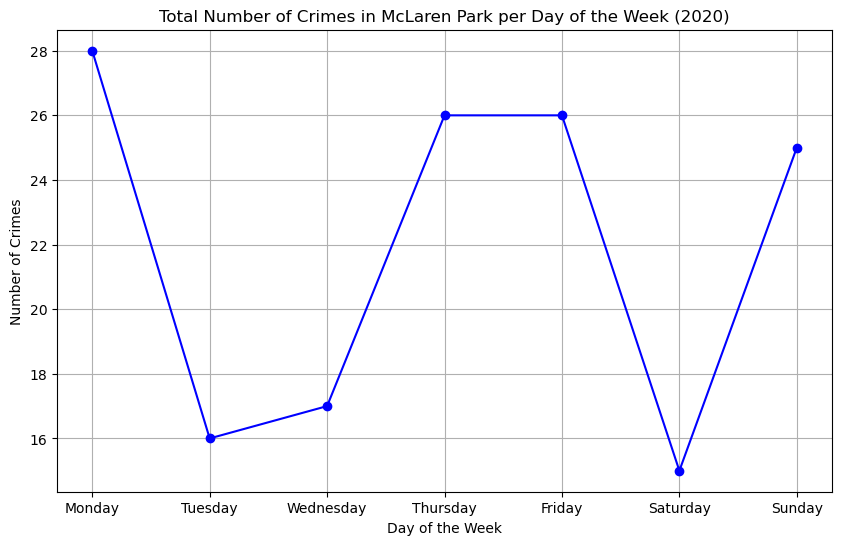

In [76]:
# Filter data for McLaren Park and the year 2020
mclaren_park_2020_data = crimedata_df[(crimedata_df['Analysis Neighborhood'] == 'McLaren Park') & (crimedata_df['Incident Year'] == 2020)]

# Group data by day of the week and calculate the total number of crimes
crimes_per_day_2020 = mclaren_park_2020_data['Incident Day of Week'].value_counts().sort_index()

# Define the order of days for proper sorting in the line graph
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line graph
plt.figure(figsize=(10, 6))
crimes_per_day_2020[days_order].plot(marker='o', linestyle='-', color='b')
plt.title('Total Number of Crimes in McLaren Park per Day of the Week (2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


In [69]:
mclaren_park_data_incident_types = crimedata_df[(crimedata_df['Analysis Neighborhood'] == 'McLaren Park') & (crimedata_df['Incident Year'].between(2018, 2023))]

# Count the occurrences of each incident category
incident_category_counts = mclaren_park_data_incident_types['Incident Category'].value_counts()

# Print the result
print("Incident Categories and Counts in McLaren Park/Crocker-Amazon from 2018 to 2023:")
print(incident_category_counts)

# Print total incident count
total_incident_count_mclaren = mclaren_park_data.shape[0]
print(f"\nTotal Incident Count in McLaren Park/Crocker-Amazon from 2018 to 2023: {total_incident_count_mclaren}")

# Total incident count for all of San Francisco
total_sf_incident_count_sf = crimedata_df.shape[0]
print(f"\nTotal Incident Count in San Francisco from 2018 to 2023: {total_sf_incident_count_sf}")

Incident Categories and Counts in McLaren Park/Crocker-Amazon from 2018 to 2023:
Incident Category
Larceny Theft                               213
Motor Vehicle Theft                          89
Recovered Vehicle                            83
Other Miscellaneous                          72
Non-Criminal                                 65
Weapons Offense                              63
Malicious Mischief                           55
Assault                                      53
Robbery                                      34
Burglary                                     26
Fraud                                        24
Suspicious Occ                               22
Traffic Violation Arrest                     18
Missing Person                               16
Disorderly Conduct                           15
Other Offenses                               15
Warrant                                      15
Weapons Carrying Etc                         14
Lost Property                        

In [70]:
# Calculate McLaren Park incident percentage over SF incidents from 2018 to 2023
# and compare it to the rest of San Francisco

mclaren_percentage_2018_2020 = (total_incident_count_mclaren / total_sf_incident_count_sf) * 100

print(f"The percentage of Mclaren Park/Crocker-Amazon incidents in comparison to the entire city of San Francisco from 2018 to 2023 is {mclaren_percentage_2018_2020 }%")


The percentage of Mclaren Park/Crocker-Amazon incidents in comparison to the entire city of San Francisco from 2018 to 2023 is 0.12824281368561372%


## Crocker-Amazon (i.e. McLaren Park) vs San Francisco Crime Rate ##

Total Incident Count in Crocker-Amazon (McLaren Park) from 2018 to 2023: 938

Total Incident Count in San Francisco from 2018 to 2023: 731425

The percentage of Crocker-Amazon (Mclaren Park) incidents in comparison to the entire city of San Francisco from 2018 to 2023 is 0.12824281368561372%

In [72]:
# Filter incidents for McLaren Park/Crocker-Amazon
mclaren_park_data = crimedata_df[(crimedata_df['Analysis Neighborhood'] == 'McLaren Park') & (crimedata_df['Incident Year'].between(2018, 2023))]

# Filter incidents for the rest of San Francisco
rest_of_sf_data = crimedata_df[(crimedata_df['Analysis Neighborhood'] != 'McLaren Park') & (crimedata_df['Incident Year'].between(2018, 2023))]

# Calculate percentages
total_sf_incidents = crimedata_df[(crimedata_df['Incident Year'].between(2018, 2023))].shape[0]
percentage_mclaren_park = (mclaren_park_data.shape[0] / total_sf_incidents) * 100
percentage_rest_of_sf = (rest_of_sf_data.shape[0] / total_sf_incidents) * 100

# Print the results
print(f"Percentage of Incidents in McLaren Park/Crocker-Amazon from 2018 to 2023: {percentage_mclaren_park:.2f}%")
print(f"Percentage of Incidents in Rest of SF from 2018 to 2023: {percentage_rest_of_sf:.2f}%")

Percentage of Incidents in McLaren Park/Crocker-Amazon from 2018 to 2023: 0.13%
Percentage of Incidents in Rest of SF from 2018 to 2023: 99.87%


In [85]:
# Filter incidents for the year 2020
sf_2020_data = crimedata_df[crimedata_df['Incident Year'] == 2020]

# Group by neighborhood and count incidents
neighborhood_crime_count = sf_2020_data.groupby('Analysis Neighborhood').size().reset_index(name='Incident Count')

# Find the neighborhood with the highest crime count
highest_crime_neighborhood = neighborhood_crime_count.loc[neighborhood_crime_count['Incident Count'].idxmax()]

# Print the result
print(f"The neighborhood with the highest crime rate in 2020 is: {highest_crime_neighborhood['Analysis Neighborhood']}")
print(f"Total incidents in {highest_crime_neighborhood['Analysis Neighborhood']} in 2020: {highest_crime_neighborhood['Incident Count']}")


The neighborhood with the highest crime rate in 2020 is: Tenderloin
Total incidents in Tenderloin in 2020: 11298


In [66]:
# Filter incidents for the year 2020
sf_2020_data = crimedata_df[crimedata_df['Incident Year'] == 2020]

# Group by neighborhood and count incidents
neighborhood_crime_count = sf_2020_data.groupby('Analysis Neighborhood').size().reset_index(name='Incident Count')

# Find the neighborhood with the highest crime count
lowest_crime_neighborhood = neighborhood_crime_count.loc[neighborhood_crime_count['Incident Count'].idxmin()]

# Print the result
print(f"The neighborhood with the highest crime rate in 2020 is: {lowest_crime_neighborhood['Analysis Neighborhood']}")
print(f"Total incidents in {lowest_crime_neighborhood['Analysis Neighborhood']} in 2020: {lowest_crime_neighborhood['Incident Count']}")

The neighborhood with the highest crime rate in 2020 is: McLaren Park
Total incidents in McLaren Park in 2020: 153


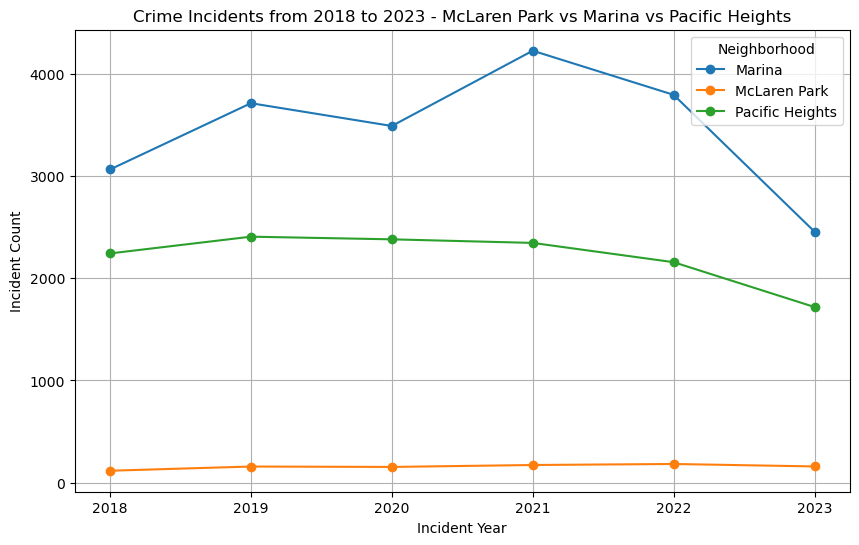

In [8]:
# Group data by "Incident Year" and "Analysis Neighborhood"
grouped_data = crimedata_df.groupby(['Incident Year', 'Analysis Neighborhood']).size().reset_index(name='Incident Count')

# Filter data for selected neighborhoods
selected_neighborhoods = ['McLaren Park', 'Marina', 'Pacific Heights']
filtered_data = grouped_data[grouped_data['Analysis Neighborhood'].isin(selected_neighborhoods)]

# Pivot data for plotting
pivot_data = filtered_data.pivot(index='Incident Year', columns='Analysis Neighborhood', values='Incident Count')

# Plot the line graph
pivot_data.plot.line(marker='o', figsize=(10, 6))
plt.title('Crime Incidents from 2018 to 2023 - McLaren Park vs Marina vs Pacific Heights')
plt.xlabel('Incident Year')
plt.ylabel('Incident Count')
plt.legend(title='Neighborhood')
plt.grid(True)
plt.show()

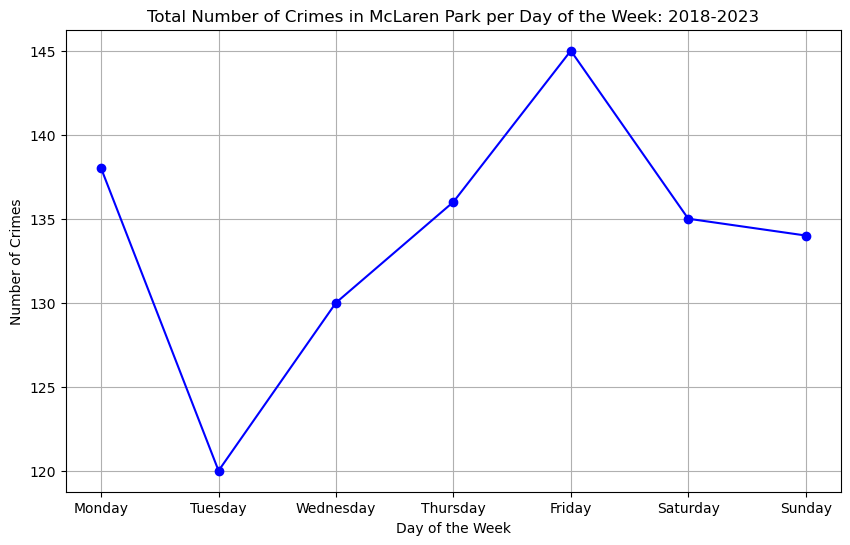

In [25]:
# Filter data for McLaren Park
mclaren_park_data_2018_2023 = crimedata_df[crimedata_df['Analysis Neighborhood'] == 'McLaren Park']

# Group data by day of the week and calculate the total number of crimes
crimes_per_day_2018_2023 = mclaren_park_data_2018_2023['Incident Day of Week'].value_counts().sort_index()

# Define the order of days for proper sorting in the line graph
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line graph
plt.figure(figsize=(10, 6))
crimes_per_day_2018_2023[days_order].plot(marker='o', linestyle='-', color='b')
plt.title('Total Number of Crimes in McLaren Park per Day of the Week: 2018-2023')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()
